In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline # you don't need this python 3, you could get rid of it. 

In our data set, we have 15 documents and 10 terms. We assume that the documents have already been preprocessed, converted into word vectors (bags of words), and inserted into an index. After preprocessing and removing "stop words" we are left with 10 index terms (used as dimensions for the document vectors).

In [2]:
DF = pd.read_csv('../../data/term-doc-mat.csv', header=None)
DF 
#print(DF.shape) = (10, 16)
# we have 15 documents expressed in terms of terms.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


<p>The documents are expressed in terms of frequncy e.g data base appears 24 times in document 1</p>
<p>You have documents and they are expressed in terms of your terms. query and sql appear in document 1 12 and 21 times respectively. </p>

Let's remove the column containing the term since we are going to operate on the matrix by taking everything more than 1 in that direction (DF.iloc[:,1:])

In [3]:

# TD = genfromtxt('term-doc-mat.csv',delimiter=',',usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=int)
TD = DF.iloc[:,1:] # TAKING EVERYTHING more than 1 in that direction
TD
# print(TD.shape) = (10, 15) # you already have your document per term without the indicies or the labels

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
# you can use the data frame iloc method, which tells you what the terms
# terms = genfromtxt('term-doc-mat.csv',delimiter=',',usecols=(0),dtype=str)
terms = DF.iloc[:,0] # this is looking at the terms 
terms
#print(type(terms)) # this is of type series

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

Transposing the TD matrix.

###### we want our documents as objects and our terms as features so we flip the data frame. 

In [5]:
DT = TD.T

Now we have a document-term matrix:¶

In [6]:
DT # now this is right shape for document categorization

,0,1,2,3,4,5,6,7,8,9
1,24,9,0,3,1,12,0,1,21,2
2,32,5,3,0,0,2,0,0,10,0
3,12,5,0,0,0,0,0,0,16,0
4,6,2,0,0,0,0,0,0,7,2
5,43,20,3,0,0,27,0,2,31,0
6,2,0,7,16,33,0,18,0,0,27
7,0,1,12,0,2,0,32,0,0,4
8,3,0,4,2,0,0,22,0,0,2
9,1,0,27,25,7,0,34,3,0,11
10,6,0,4,23,12,22,17,9,0,8


In [7]:
DT.shape # 15 documents and 10 features which have been attained by flipping the data set. 

(15, 10)

In [8]:
len(DT.iloc[1]) # how many terms do we have

10

In [9]:
numTerms=DT.shape[1] # how may documents do we have?
# could also say numTerms = len(DT.ix[1])
NDocs = DT.shape[0] # how many terms do we have?

In [10]:
print (numTerms)
print (NDocs)

10
15


#### Next, let's compute term frequencies to get an idea of their distributions across the corpus.

In [11]:
termFreqs = TD.sum(axis=1) # we want to see how many times database appears in all of the documents
print (termFreqs) # e.g database term (which is 0) appeared 133 times in  the entire corpus
# the entire corpus being all of your documents. 
 

0    133
1     99
2     61
3    114
4     90
5     84
6    123
7     62
8     86
9    129
dtype: int64


## you can trace back what the terms are.

In [12]:
dictTF = {}
for i in range(numTerms):
               dictTF[terms[i]] = termFreqs[i] # we are associating the term frequency of i with what term it actually was
print (sorted(dictTF.items()))
sortedTF = sorted(dictTF.values(), reverse=True) # Sorting by values in descending order, because we would like to see the most popular one
print (sortedTF)

[('database', 133), ('index', 99), ('likelihood', 61), ('linear', 114), ('matrix', 90), ('query', 84), ('regression', 123), ('retrieval', 62), ('sql', 86), ('vector', 129)]
[133, 129, 123, 114, 99, 90, 86, 84, 62, 61]


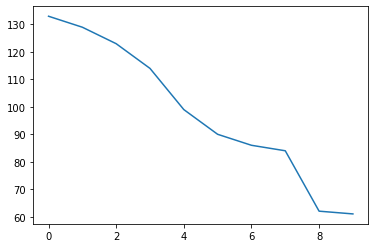

In [13]:
plt.plot(sortedTF)
plt.show()
# we notice that the databases  term is the top one
# we care about the more frequent words
# this is a simplest example which illustrates something that happens alot with text documents 
# that you will have a few terms that occur more and kind of your topic  and will quickly decrease. 
# The more frequent terms are the ones that you care about.
# we don't want stop words. It is advisable to remove them.

#### We convert the dataframe into a Numpy array which will be used as input for our search function.

In [14]:
DT = np.array(DT)
DT # we always want convert the df to numpy

array([[24,  9,  0,  3,  1, 12,  0,  1, 21,  2],
       [32,  5,  3,  0,  0,  2,  0,  0, 10,  0],
       [12,  5,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  7,  2],
       [43, 20,  3,  0,  0, 27,  0,  2, 31,  0],
       [ 2,  0,  7, 16, 33,  0, 18,  0,  0, 27],
       [ 0,  1, 12,  0,  2,  0, 32,  0,  0,  4],
       [ 3,  0,  4,  2,  0,  0, 22,  0,  0,  2],
       [ 1,  0, 27, 25,  7,  0, 34,  3,  0, 11],
       [ 6,  0,  4, 23, 12, 22, 17,  9,  0,  8],
       [ 4, 27,  0,  7, 14,  9,  0, 27,  0, 33],
       [ 0, 14,  1, 12,  5,  4,  0,  7,  0, 16],
       [ 0,  3,  0, 21, 12,  0,  0,  5,  0, 14],
       [ 0,  2,  0,  3,  4,  5,  0,  4,  1,  7],
       [ 0, 11,  0,  2,  0,  3,  0,  4,  0,  3]], dtype=int64)

#### The search function takes a query object (in this case a vector of word frequencies), and searches for the K most similar (least distant) items in the data (our index of documents). The "measure" parameter allows us to use either the Euclidean distance or the inverse of Cosine similarity as our ditance metric. The function returns the indices of the K most similar neighbors and a list of their distances to the query object.

In [15]:
def knn_search(x, D, K, measure): # x is your query object
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1: # normalize the entire matrix
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))]) # it is normalizing the entire matrix so what happens if the matrix is already normalized.  
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm) # finding the cosine distance on the entire matrix
        dists = 1 - sims  # your distance  is 1 - similarity.
    idx = np.argsort(dists) # then you are using argsort from numpy to sort the distance in decreasing order
    print(idx) # we can check that here.
    # return the indexes of K nearest neighbors
    return idx[:K], sorted(dists)[:K]

#### Let's now try this on a new query object

In [16]:
# this is my query and it is assuming taking my document and now i am counting how often do these important words appear
# I am making an array which I am going to use in the search. 
x = np.array([3, 22, 0, 17, 9, 6, 1, 12, 0, 22])  
# I make it an array
x

array([ 3, 22,  0, 17,  9,  6,  1, 12,  0, 22])

In [21]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
# The function is going to return the sorted distances, and the neighbor indicies.
# I am passing 5 neighbors 
# 1 means wanting cosine distance 
# DT is the matrix, x is the query object
neigh_idx, distances = knn_search(x, DT, 5, 1) 
# it prints the indicies of the of k

[11 10 13 14 12  5  9  8  0  4  3  2  1  7  6]


# it printed the indicies of the shortest


In [22]:
neigh_idx # so the closest neigbors are 11, 10, 13, 14, and 12

array([11, 10, 13, 14, 12], dtype=int64)

In [19]:
distances # the first and the second are very close which gets a bit further
# depending on how your data varies, it may be signifant or not signficant. 

[0.007384832059843194,
 0.06951084935929697,
 0.15227630019906346,
 0.17224860028549083,
 0.1944004587361089]

In [23]:
# array([11, 10, 12, 14, 13])

In [24]:
DT[neigh_idx] # take the indices and find out which documents were these
# and the out put shows what they were

array([[ 0, 14,  1, 12,  5,  4,  0,  7,  0, 16],
       [ 4, 27,  0,  7, 14,  9,  0, 27,  0, 33],
       [ 0,  2,  0,  3,  4,  5,  0,  4,  1,  7],
       [ 0, 11,  0,  2,  0,  3,  0,  4,  0,  3],
       [ 0,  3,  0, 21, 12,  0,  0,  5,  0, 14]], dtype=int64)

In [25]:
# Finding the k=5 nearest neighbors using Euclidean distance metric
neigh_idx, distances = knn_search(x, DT, 5, 0) # using same number of neighbiurs but using euclidean distance

[11 10 12 14 13  9  3  5  2  7  0  1  6  8  4]


In [26]:
neigh_idx

array([11, 10, 12, 14, 13], dtype=int64)

In [27]:
# this distance are very different 
# lets compare the neighbor indicies [11, 10, 12, 14, 13] to [11, 10, 13, 14, 12
# 11 and 10 remain in the same order
# 13, 14 and 12 are the same, but they kind of swithed order which would give different results
# so depending what classes they were, we are not doing that, we are just returning neighbors just like in the
# case mummy grany where are just saying these are the similar ones 
distances
# this doesn't mean much until you look at classes though it interesting to know. 
# the first distance and second look closer but there is a big gap. 
# there is abigger gap in the distances as you look below

[13.45362404707371,
 22.516660498395403,
 23.345235059857504,
 29.512709126747414,
 30.364452901377952]

In [28]:
DT[neigh_idx] # take the indices and find out which documents were these
# and the out put shows what they were

array([[ 0, 14,  1, 12,  5,  4,  0,  7,  0, 16],
       [ 4, 27,  0,  7, 14,  9,  0, 27,  0, 33],
       [ 0,  3,  0, 21, 12,  0,  0,  5,  0, 14],
       [ 0, 11,  0,  2,  0,  3,  0,  4,  0,  3],
       [ 0,  2,  0,  3,  4,  5,  0,  4,  1,  7]], dtype=int64)